In [57]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [58]:
G = nx.davis_southern_women_graph()

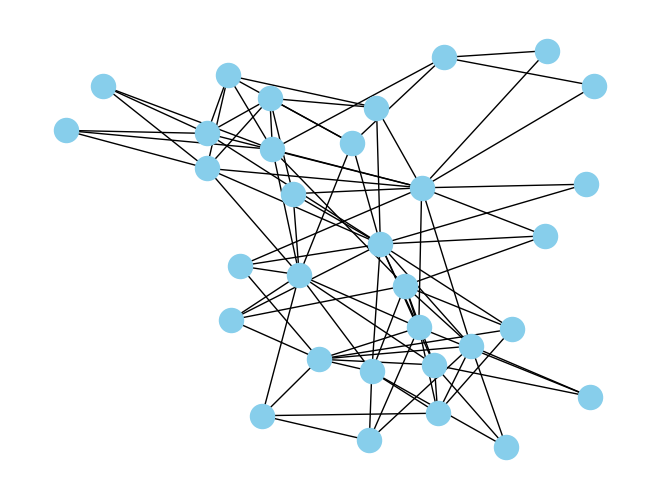

In [59]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=300, node_color='skyblue')

In [60]:
nodes = list(G.nodes)
edges = list(G.edges)
df = pd.DataFrame(edges, columns=('name', 'relation'))
df.head()

,name,relation
0,Evelyn Jefferson,E1
1,Evelyn Jefferson,E2
2,Evelyn Jefferson,E3
3,Evelyn Jefferson,E4
4,Evelyn Jefferson,E5


In [61]:
edges

[('Evelyn Jefferson', 'E1'),
 ('Evelyn Jefferson', 'E2'),
 ('Evelyn Jefferson', 'E3'),
 ('Evelyn Jefferson', 'E4'),
 ('Evelyn Jefferson', 'E5'),
 ('Evelyn Jefferson', 'E6'),
 ('Evelyn Jefferson', 'E8'),
 ('Evelyn Jefferson', 'E9'),
 ('Laura Mandeville', 'E1'),
 ('Laura Mandeville', 'E2'),
 ('Laura Mandeville', 'E3'),
 ('Laura Mandeville', 'E5'),
 ('Laura Mandeville', 'E6'),
 ('Laura Mandeville', 'E7'),
 ('Laura Mandeville', 'E8'),
 ('Theresa Anderson', 'E2'),
 ('Theresa Anderson', 'E3'),
 ('Theresa Anderson', 'E4'),
 ('Theresa Anderson', 'E5'),
 ('Theresa Anderson', 'E6'),
 ('Theresa Anderson', 'E7'),
 ('Theresa Anderson', 'E8'),
 ('Theresa Anderson', 'E9'),
 ('Brenda Rogers', 'E1'),
 ('Brenda Rogers', 'E3'),
 ('Brenda Rogers', 'E4'),
 ('Brenda Rogers', 'E5'),
 ('Brenda Rogers', 'E6'),
 ('Brenda Rogers', 'E7'),
 ('Brenda Rogers', 'E8'),
 ('Charlotte McDowd', 'E3'),
 ('Charlotte McDowd', 'E4'),
 ('Charlotte McDowd', 'E5'),
 ('Charlotte McDowd', 'E7'),
 ('Frances Anderson', 'E3'),
 ('Fra

In [25]:
df.relation.unique()

array(['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E8', 'E9', 'E7', 'E12', 'E10',
       'E13', 'E14', 'E11'], dtype=object)

In [26]:
int(df.relation[1].split('E')[1])

2

In [48]:
def add_weight(data, graph):

    weight_edge =0  
    for _, row in data.iterrows():
        name = row.name
        relation = row.relation
        if int(row.relation.split('E')[1]) % 2 ==0:
            weight_edge =  1.03 * int(row.relation.split('E')[1])
        else: 
            weight_edge = 1.05 * int(row.relation.split('E')[1])

    graph.add_edge(name, relation, weight=weight_edge)
    nx.set_edge_attributes(graph, {(name, relation): {'weight': weight_edge}})
    return graph



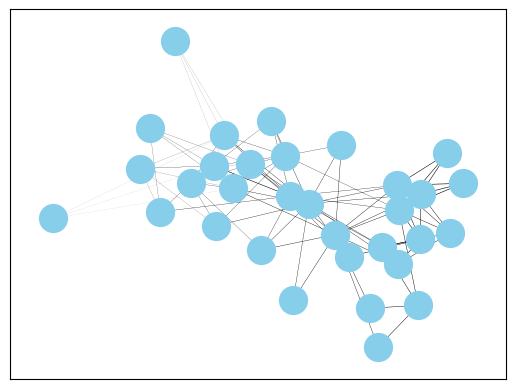

In [62]:
G = add_weight(df, G)
pos = nx.spring_layout(G)
G.add_nodes_from(df['name'])
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[data['weight'] for _,_, data in edges])
nx.draw_networkx_nodes(G, pos, node_size=400, node_color= 'skyblue')
plt.show()


In [63]:
edges

EdgeDataView([('Evelyn Jefferson', 'E1', {'weight': 0.03}), ('Evelyn Jefferson', 'E2', {'weight': 0.06}), ('Evelyn Jefferson', 'E3', {'weight': 0.09}), ('Evelyn Jefferson', 'E4', {'weight': 0.12}), ('Evelyn Jefferson', 'E5', {'weight': 0.15}), ('Evelyn Jefferson', 'E6', {'weight': 0.18}), ('Evelyn Jefferson', 'E8', {'weight': 0.24}), ('Evelyn Jefferson', 'E9', {'weight': 0.27}), ('Laura Mandeville', 'E1', {'weight': 0.03}), ('Laura Mandeville', 'E2', {'weight': 0.06}), ('Laura Mandeville', 'E3', {'weight': 0.09}), ('Laura Mandeville', 'E5', {'weight': 0.15}), ('Laura Mandeville', 'E6', {'weight': 0.18}), ('Laura Mandeville', 'E7', {'weight': 0.21}), ('Laura Mandeville', 'E8', {'weight': 0.24}), ('Theresa Anderson', 'E2', {'weight': 0.06}), ('Theresa Anderson', 'E3', {'weight': 0.09}), ('Theresa Anderson', 'E4', {'weight': 0.12}), ('Theresa Anderson', 'E5', {'weight': 0.15}), ('Theresa Anderson', 'E6', {'weight': 0.18}), ('Theresa Anderson', 'E7', {'weight': 0.21}), ('Theresa Anderson',

In [64]:
G.nodes()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))

In [81]:
closseness = nx.closeness_centrality(G)
closseness.values()

dict_values([0.5166666666666667, 0.4696969696969697, 0.5166666666666667, 0.4696969696969697, 0.3875, 0.4305555555555556, 0.4305555555555556, 0.4305555555555556, 0.45588235294117646, 0.45588235294117646, 0.44285714285714284, 0.4696969696969697, 0.5, 0.5166666666666667, 0.4696969696969697, 0.4189189189189189, 0.3780487804878049, 0.3780487804878049, 0.36904761904761907, 0.36904761904761907, 0.3974358974358974, 0.3780487804878049, 0.4189189189189189, 0.484375, 0.5166666666666667, 0.5961538461538461, 0.5535714285714286, 0.3875, 0.3780487804878049, 0.3974358974358974, 0.36904761904761907, 0.36904761904761907])

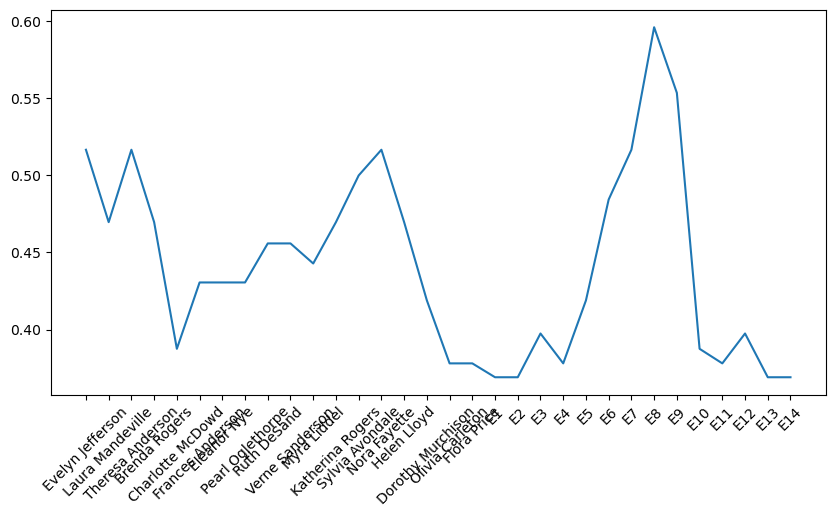

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(closseness.keys(), closseness.values())
plt.xticks(rotation=45)
plt.show()

In [91]:
G.edges()

EdgeView([('Evelyn Jefferson', 'E1'), ('Evelyn Jefferson', 'E2'), ('Evelyn Jefferson', 'E3'), ('Evelyn Jefferson', 'E4'), ('Evelyn Jefferson', 'E5'), ('Evelyn Jefferson', 'E6'), ('Evelyn Jefferson', 'E8'), ('Evelyn Jefferson', 'E9'), ('Laura Mandeville', 'E1'), ('Laura Mandeville', 'E2'), ('Laura Mandeville', 'E3'), ('Laura Mandeville', 'E5'), ('Laura Mandeville', 'E6'), ('Laura Mandeville', 'E7'), ('Laura Mandeville', 'E8'), ('Theresa Anderson', 'E2'), ('Theresa Anderson', 'E3'), ('Theresa Anderson', 'E4'), ('Theresa Anderson', 'E5'), ('Theresa Anderson', 'E6'), ('Theresa Anderson', 'E7'), ('Theresa Anderson', 'E8'), ('Theresa Anderson', 'E9'), ('Brenda Rogers', 'E1'), ('Brenda Rogers', 'E3'), ('Brenda Rogers', 'E4'), ('Brenda Rogers', 'E5'), ('Brenda Rogers', 'E6'), ('Brenda Rogers', 'E7'), ('Brenda Rogers', 'E8'), ('Charlotte McDowd', 'E3'), ('Charlotte McDowd', 'E4'), ('Charlotte McDowd', 'E5'), ('Charlotte McDowd', 'E7'), ('Frances Anderson', 'E3'), ('Frances Anderson', 'E5'), ('F

In [93]:
nx.global_efficiency(G)

0.5152889784946203

In [96]:
betweenness = nx.betweenness_centrality(G)
max_bet = max(betweenness, key=betweenness.get)
max_bet

'E8'